In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set()
%matplotlib inline

In [2]:
train_data = pd.read_csv('train_yaOffsB.csv')
test_data = pd.read_csv('test_pFkWwen.csv')
sample_submission_data = pd.read_csv('sample_submission_O1oDc4H.csv')

In [3]:
train_data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
train_data.describe(include='all')

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
unique,88858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,F00062579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,NaN,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,NaN,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,NaN,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,NaN,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,NaN,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000


In [5]:
train_data.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

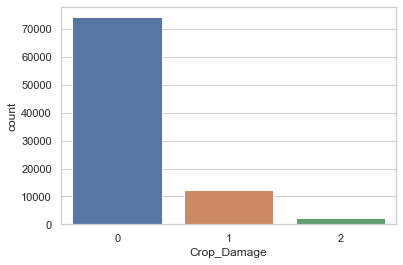

In [6]:
sns.set_style('whitegrid')
sns.countplot('Crop_Damage',data=train_data)

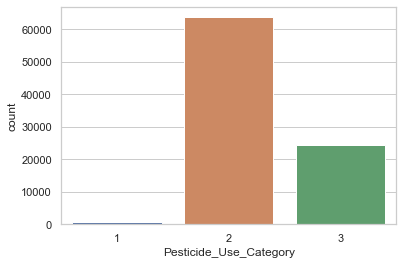

In [7]:
sns.countplot('Pesticide_Use_Category',data=train_data)

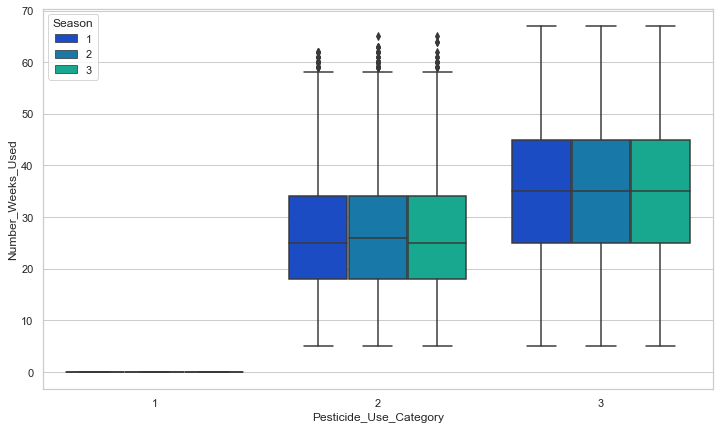

In [8]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pesticide_Use_Category',y='Number_Weeks_Used',data=train_data,palette='winter',hue='Season')

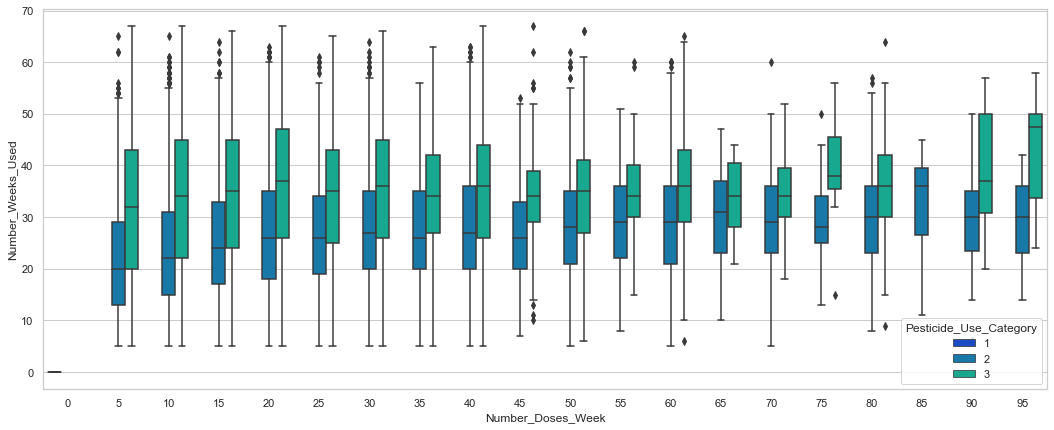

In [9]:
plt.figure(figsize=(18, 7))
sns.boxplot(x='Number_Doses_Week',y='Number_Weeks_Used',data=train_data,palette='winter',hue='Pesticide_Use_Category')

In [10]:
def impute(column):
    Number_Weeks_Used = column[0]
    Pesticide_Use_Category = column[1]
    Number_Doses_Week = column[2]
    
    if pd.isnull(Number_Weeks_Used):
        
        if ((Pesticide_Use_Category==1) or (Number_Doses_Week==0)):
            return 0
        
        elif Pesticide_Use_Category==2:
            if Number_Doses_Week==5:
                return 20
            elif ((Number_Doses_Week >=10) and (Number_Doses_Week <=50)):
                return 25
            elif (Number_Doses_Week==85):
                return 36
            else:
                return 30
        elif Pesticide_Use_Category==3:
            if ((Number_Doses_Week >=5) and (Number_Doses_Week <=80)):
                return 34.5
            elif (Number_Doses_Week==85):
                return 0
            elif (Number_Doses_Week==90):
                return 35
            else:
                return 48
    else:
        return Number_Weeks_Used

In [11]:
train_data['Number_Weeks_Used'] = train_data[['Number_Weeks_Used','Pesticide_Use_Category','Number_Doses_Week']].apply(impute,axis=1)

In [12]:
train_data.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [14]:
X = train_data.iloc[:,1:-1].values
y = train_data.iloc[:,-1].values

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [16]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [ ]:
from sklearn.linear_model import RidgeClassifier
ridge_classifier = RidgeClassifier()

In [22]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score

n_folds = 10
scores = []
def k_fold(classifier):
    
    cv = KFold(n_splits=10, random_state=42, shuffle=False)
    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index)

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        classifier.fit(X_train, y_train)
        scores.append(classifier.score(X_test, y_test))
    print(np.mean(scores))

In [23]:
k_fold(knn_classifier)

0.8233248585756605


In [24]:
k_fold(nb_classifier)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.8221432270777818


In [25]:
k_fold(rf_classifier)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.8207890069900181


In [26]:
k_fold(dt_classifier)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.8032872861155959


In [46]:
k_fold(ridge_classifier)

In [32]:
test_data

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
59305,F00155937,3337,1,0,2,20,34.0,12,1
59306,F00155940,3516,1,0,2,20,32.0,10,2
59307,F00155941,3702,1,0,2,10,NaN,48,1
59308,F00155943,3702,1,0,2,10,28.0,17,2


In [33]:
test_data.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

In [34]:
test_data['Number_Weeks_Used'] = test_data[['Number_Weeks_Used','Pesticide_Use_Category','Number_Doses_Week']].apply(impute,axis=1)

In [35]:
x = test_data.iloc[:,1:]
x

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,0.0,0,2
1,410,1,1,1,0,0.0,0,2
2,626,1,0,1,0,0.0,0,2
3,731,1,0,1,0,0.0,0,2
4,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...
59305,3337,1,0,2,20,34.0,12,1
59306,3516,1,0,2,20,32.0,10,2
59307,3702,1,0,2,10,25.0,48,1
59308,3702,1,0,2,10,28.0,17,2


In [36]:
y_pred = knn_classifier.predict(x)

In [37]:
result_data = test_data.copy()
result_data['Crop_Damage'] = y_pred

In [38]:
result_data

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000002,188,1,1,1,0,0.0,0,2,1
1,F00000007,410,1,1,1,0,0.0,0,2,1
2,F00000011,626,1,0,1,0,0.0,0,2,1
3,F00000013,731,1,0,1,0,0.0,0,2,1
4,F00000014,789,0,0,1,0,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
59305,F00155937,3337,1,0,2,20,34.0,12,1,0
59306,F00155940,3516,1,0,2,20,32.0,10,2,0
59307,F00155941,3702,1,0,2,10,25.0,48,1,0
59308,F00155943,3702,1,0,2,10,28.0,17,2,0


In [39]:
final = pd.DataFrame()
final['ID'] = result_data['ID']
final['Crop_Damage'] = result_data['Crop_Damage']

In [40]:
final

,ID,Crop_Damage
0,F00000002,1
1,F00000007,1
2,F00000011,1
3,F00000013,1
4,F00000014,1
...,...,...
59305,F00155937,0
59306,F00155940,0
59307,F00155941,0
59308,F00155943,0


In [30]:
#final.to_csv('Agriculture_2.csv',index=False)